<a href="https://colab.research.google.com/github/baby1146/baby1146/blob/main/IBM_HR_Analytics_Employee_Attrition_%26_Performance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IBM HR Analytics Employee Attrition & Performance**

##1. Introduction
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Attrition Rate: the percentage of employees leaving an organization over a certain period.

##1.1 Dataset Overview
**Education**: 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor

**Env.Satisfaction**: 1-Low, 2-Medium, 3-High, 4-Very High

**Job Involvement**: 1-Low, 2-Medium, 3-High, 4-Very High

**Job Satisfaction**: 1-Low, 2-Medium, 3-High, 4-Very High

**Relationship Satisfaction**: 1-Low, 2-Medium, 3-High, 4-Very High

**Performance Rating**: 1-Low, 2-Good, 3-Excellent, 4-Outstanding

**Work-Life Balance**: 1-Bad, 2-Good, 3-Better, 4-Best

This dataset contains information about employee attrition data.


##2. Data Collection

In [34]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub
import os

# Download latest version
dataset_dir = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

# Find the CSV file within the downloaded directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        csv_path = os.path.join(dataset_dir, filename)
        break

# Read the CSV file using pandas
df = pd.read_csv(csv_path)


Using Colab cache for faster access to the 'ibm-hr-analytics-attrition-dataset' dataset.


In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#3.Data Cleaning and Preprocessing

In [5]:
# Overview of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:

# Check for Missing Values
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


we have no null values

In [7]:
#Basic Statistics:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#check duplicate values
df.duplicated().sum()

np.int64(0)

In [9]:
# Drop irrelevant columns
irrelevant_cols = ['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours']
attrition_df = df.drop(columns=irrelevant_cols)

In [10]:
attrition_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,3,2,2,17,3,2,7,7,7,7


#4.Exploratory Data Analysis (EDA)

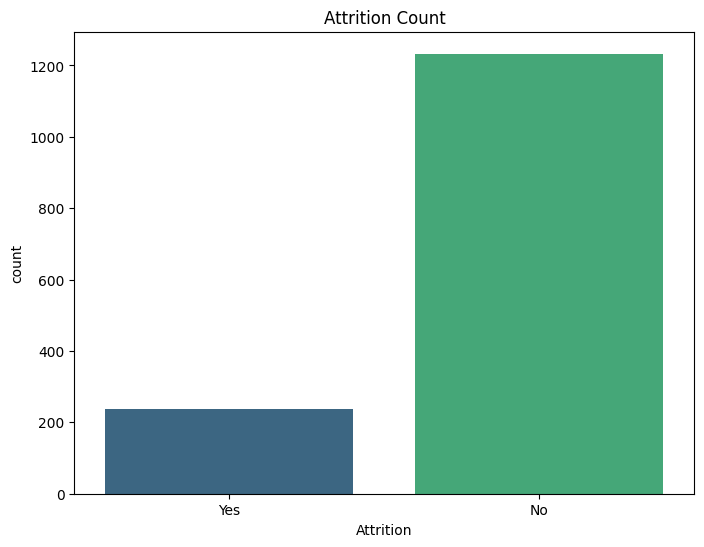

In [11]:
# Understanding the distribution of 'Attrition'
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=attrition_df, palette='viridis')
plt.title('Attrition Count')
plt.show()

In [12]:
# Outlier Analysis
# Analyzing numeric columns for potential outliers
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
                  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                  'YearsWithCurrManager']

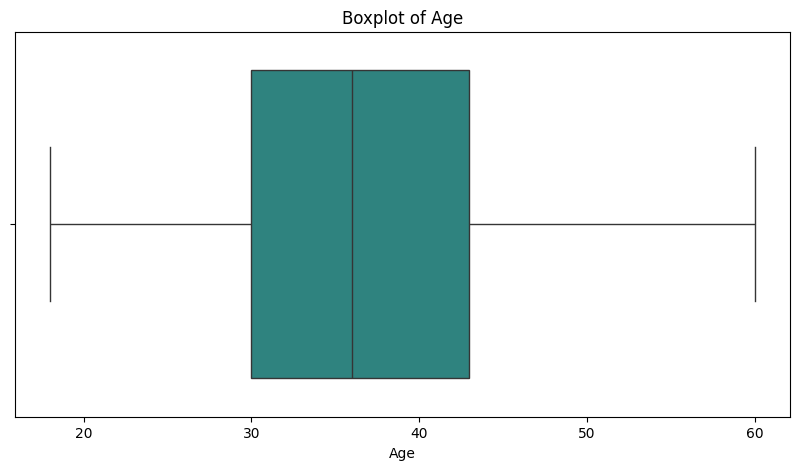

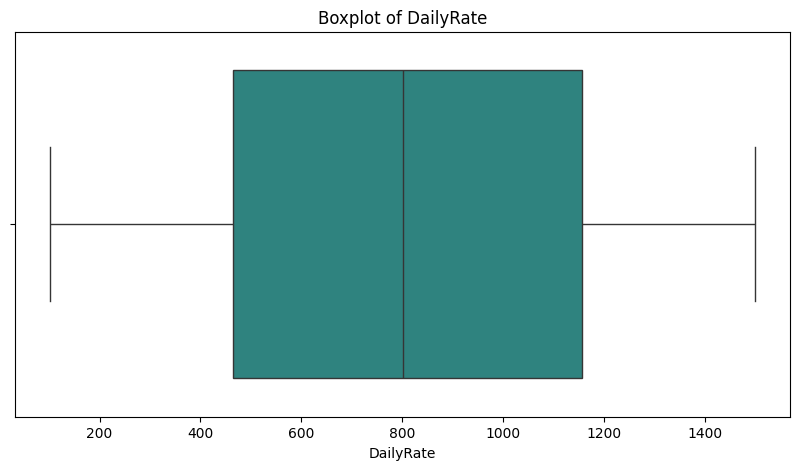

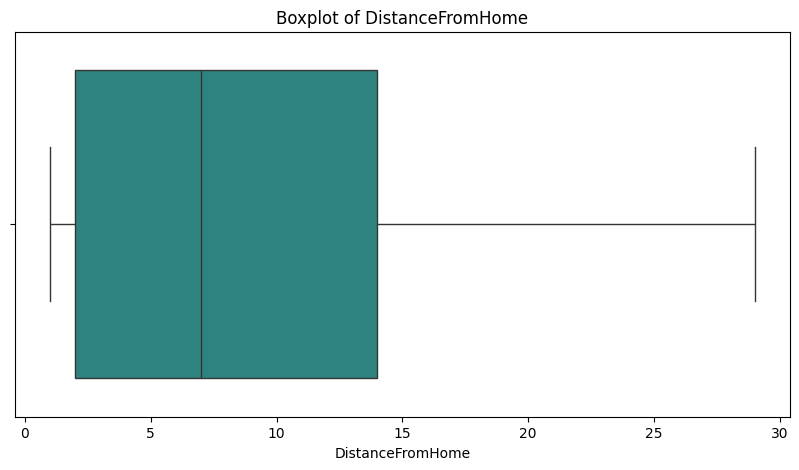

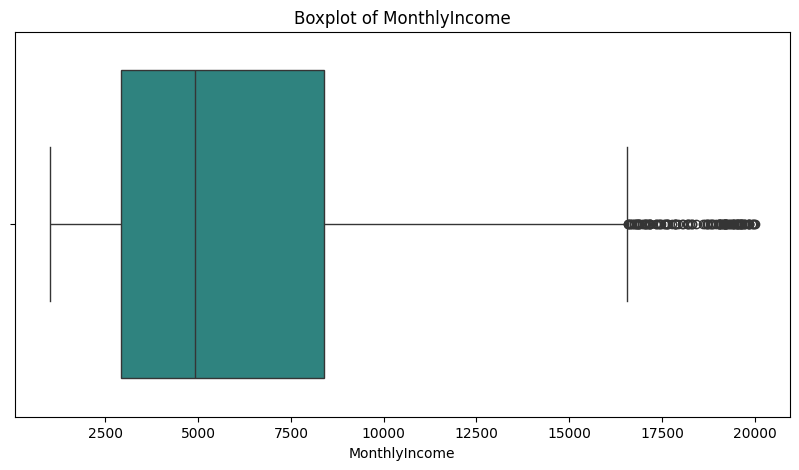

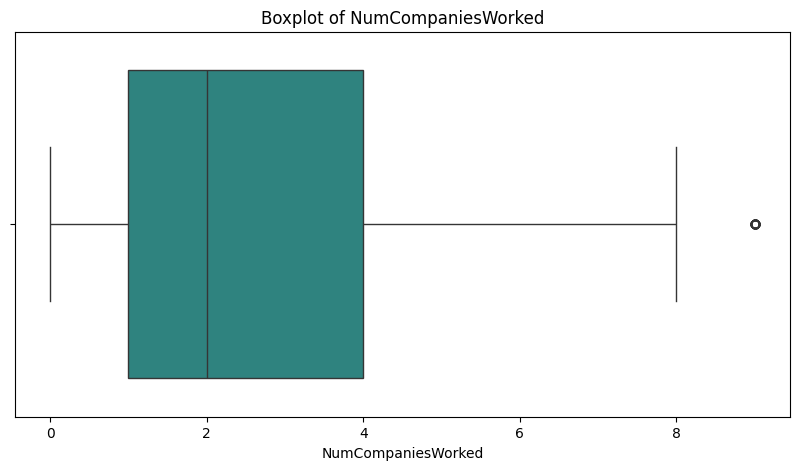

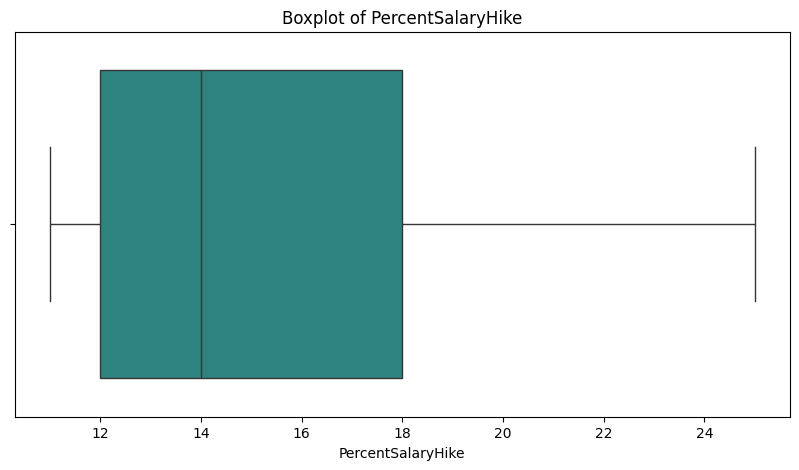

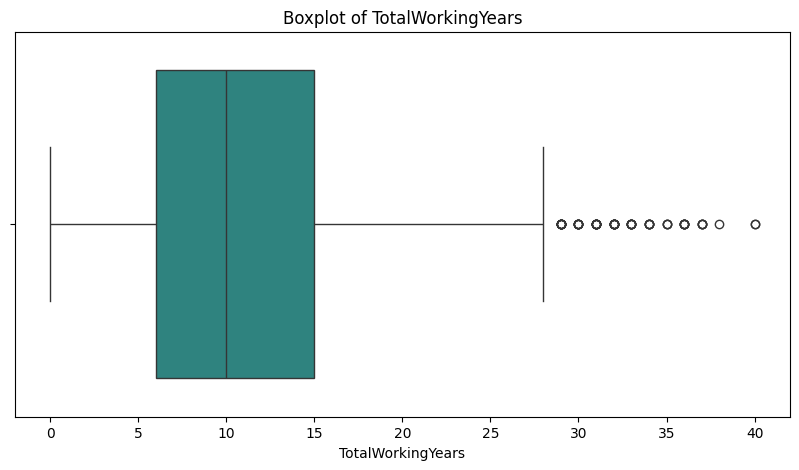

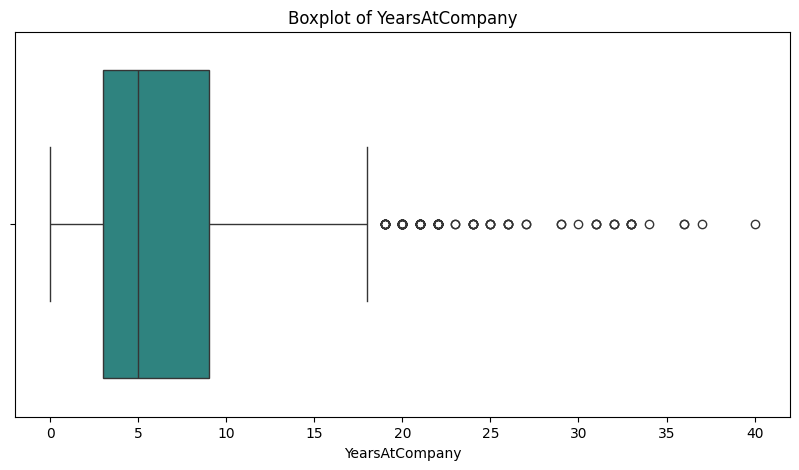

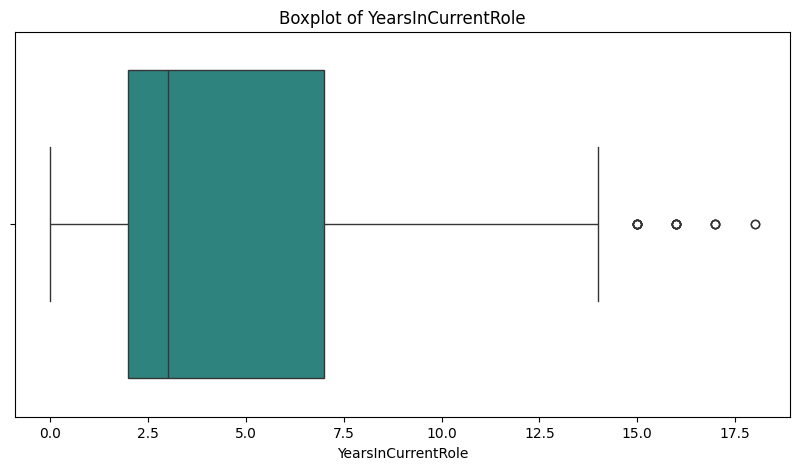

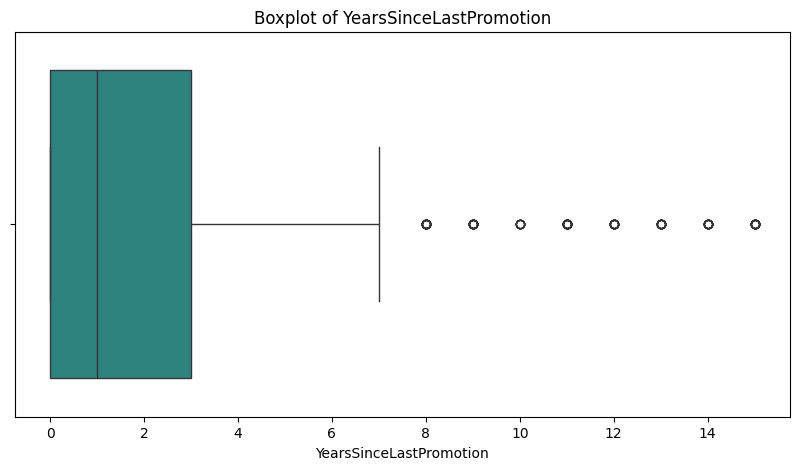

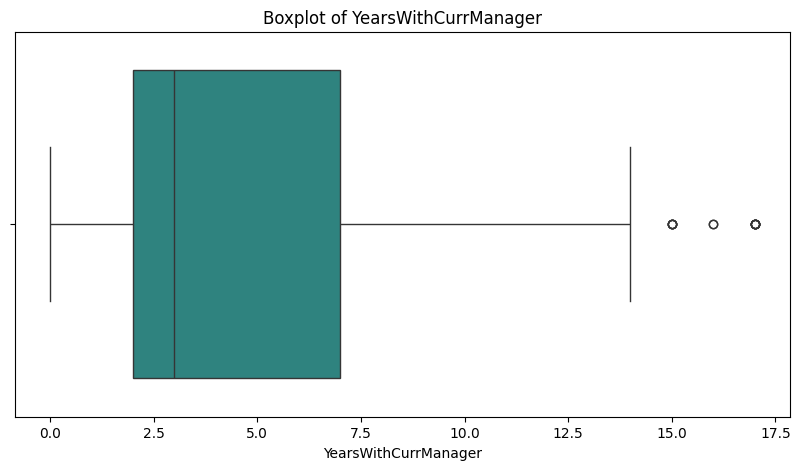

In [13]:
# Boxplots for outliers
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=attrition_df, x=col, palette='viridis')
    plt.title(f'Boxplot of {col}')
    plt.show()


Analyzing outliers for 'YearsWithCurrManager':
Number of outliers: 14
Lower bound: -5.5, Upper bound: 14.5

Analyzing outliers for 'YearsSinceLastPromotion':
Number of outliers: 107
Lower bound: -4.5, Upper bound: 7.5

Analyzing outliers for 'YearsInCurrentRole':
Number of outliers: 21
Lower bound: -5.5, Upper bound: 14.5

Analyzing outliers for 'YearsAtCompany':
Number of outliers: 104
Lower bound: -6.0, Upper bound: 18.0

Analyzing outliers for 'TotalWorkingYears':
Number of outliers: 63
Lower bound: -7.5, Upper bound: 28.5

Analyzing outliers for 'MonthlyIncome':
Number of outliers: 114
Lower bound: -5291.0, Upper bound: 16581.0
Final dataset shape: (1470, 31)


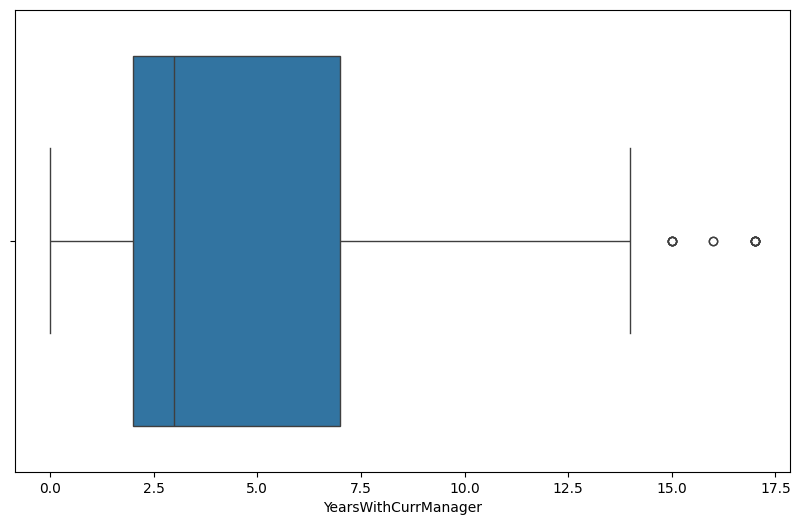

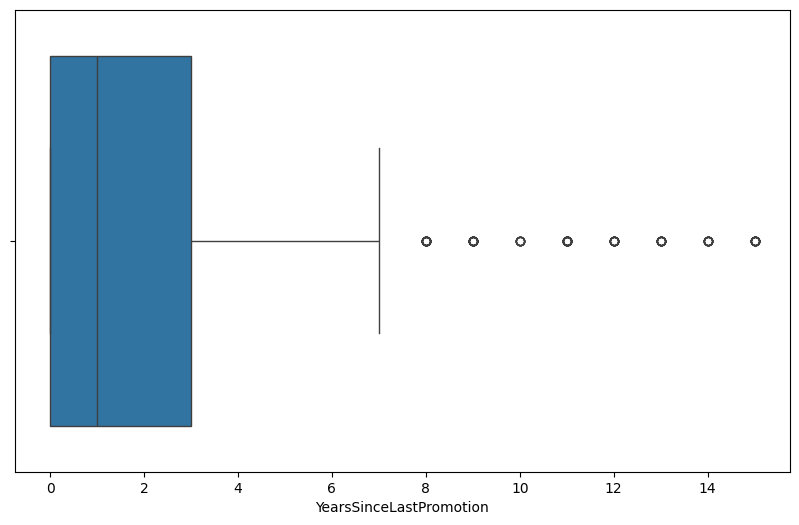

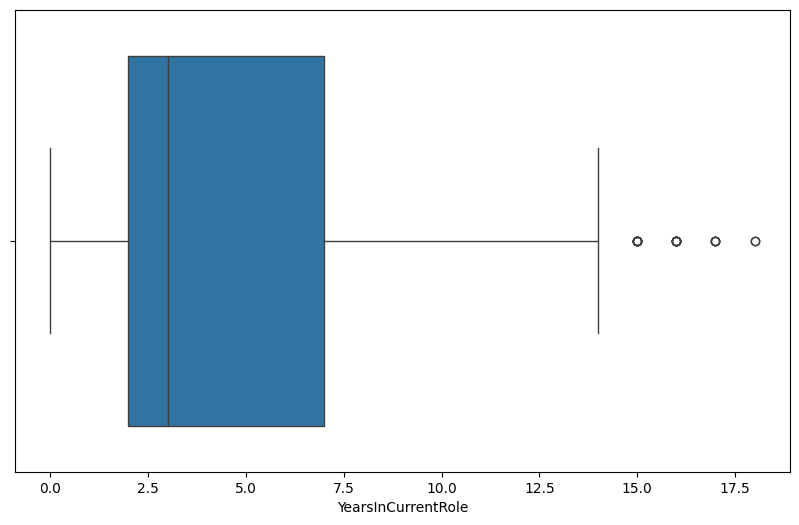

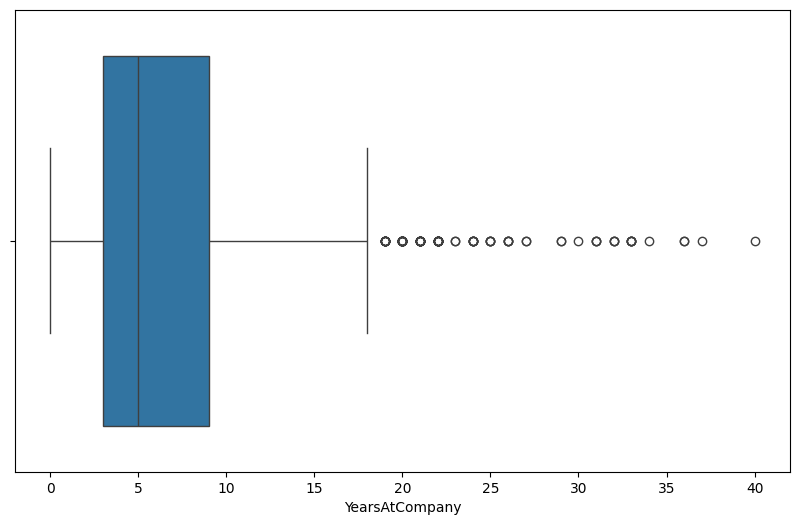

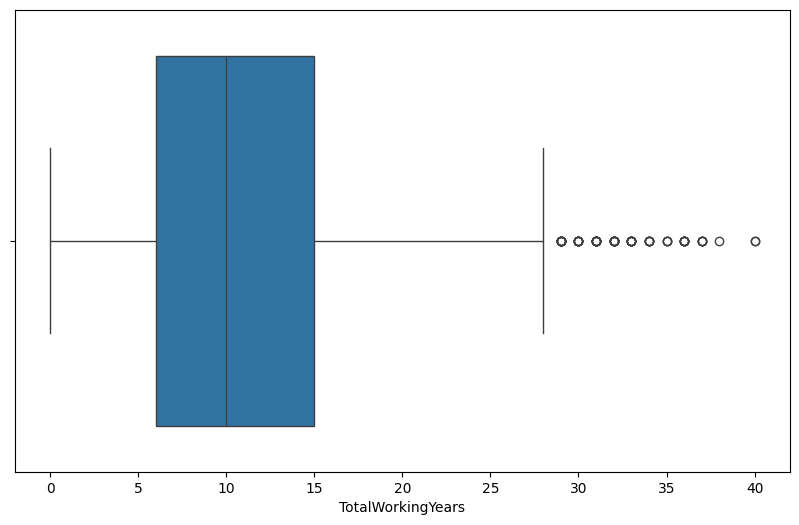

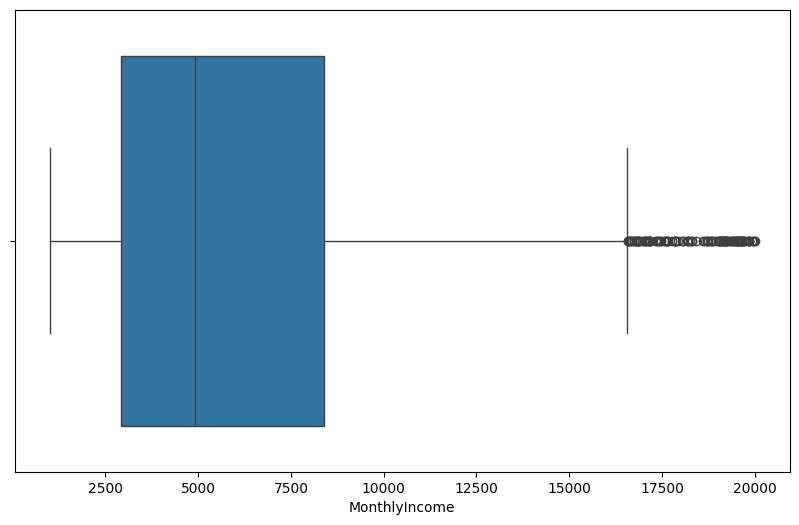

In [14]:

# List of features to handle outliers
features = ['YearsWithCurrManager', 'YearsSinceLastPromotion',
            'YearsInCurrentRole', 'YearsAtCompany',
            'TotalWorkingYears', 'MonthlyIncome']

# Function to Analyze outliers
def handle_outliers(df, features):
    for feature in features:
        # Calculate IQR
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(f"\nAnalyzing outliers for '{feature}':")
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        print(f"Number of outliers: {len(outliers)}")
        print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
         # Plot box plot to visualize outliers
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[feature])


    return df

# Handle outliers
df_cleaned = handle_outliers(attrition_df, features)

# For analysis, show the final dataset shape
print(f"Final dataset shape: {df_cleaned.shape}")



In [15]:

# Function to handle outliers by capping or removing them
def handle_outliers(df, column, lower_bound, upper_bound, action='remove'):
    """
    Handle outliers for a given column.
    Parameters:
    - attrition_df: The dataframe
    - column: The column to handle
    - lower_bound: The lower bound for outliers
    - upper_bound: The upper bound for outliers
    - action: 'remove' to remove outliers, 'cap' to cap the outliers
    """
    if action == 'remove':
        # Remove outliers by filtering based on the IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    elif action == 'cap':
        # Cap the outliers to the upper and lower bounds
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Handling outliers for 'YearsWithCurrManager'
attrition_df = handle_outliers(attrition_df, 'YearsWithCurrManager', lower_bound=-5.5, upper_bound=14.5, action='remove')

# Handling outliers for 'YearsSinceLastPromotion'
attrition_df = handle_outliers(attrition_df, 'YearsSinceLastPromotion', lower_bound=-4.5, upper_bound=7.5, action='remove')

# Handling outliers for 'YearsInCurrentRole'
attrition_df = handle_outliers(attrition_df, 'YearsInCurrentRole', lower_bound=-5.5, upper_bound=14.5, action='remove')

# Handling outliers for 'YearsAtCompany'
attrition_df = handle_outliers(attrition_df, 'YearsAtCompany', lower_bound=-6.0, upper_bound=18.0, action='remove')

# Handling outliers for 'TotalWorkingYears'
attrition_df = handle_outliers(attrition_df, 'TotalWorkingYears', lower_bound=-7.5, upper_bound=28.5, action='remove')

# Handling outliers for 'MonthlyIncome'
attrition_df = handle_outliers(attrition_df, 'MonthlyIncome', lower_bound=-5291.0, upper_bound=16581.0, action='cap')

# After handling outliers, check the shape of the dataset
print(f"Final dataset shape: {attrition_df.shape}")

# You can check the changes by inspecting any column
print(attrition_df[['YearsWithCurrManager', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'YearsAtCompany', 'TotalWorkingYears', 'MonthlyIncome']].describe())


Final dataset shape: (1273, 31)
       YearsWithCurrManager  YearsSinceLastPromotion  YearsInCurrentRole  \
count           1273.000000              1273.000000         1273.000000   
mean               3.495679                 1.428123            3.573449   
std                3.072272                 1.976607            3.078044   
min                0.000000                 0.000000            0.000000   
25%                1.000000                 0.000000            2.000000   
50%                2.000000                 1.000000            2.000000   
75%                7.000000                 2.000000            7.000000   
max               14.000000                 7.000000           14.000000   

       YearsAtCompany  TotalWorkingYears  MonthlyIncome  
count     1273.000000        1273.000000    1273.000000  
mean         5.385703           9.377062    5474.739199  
std          3.731518           5.794096    3553.781321  
min          0.000000           0.000000    1009.00

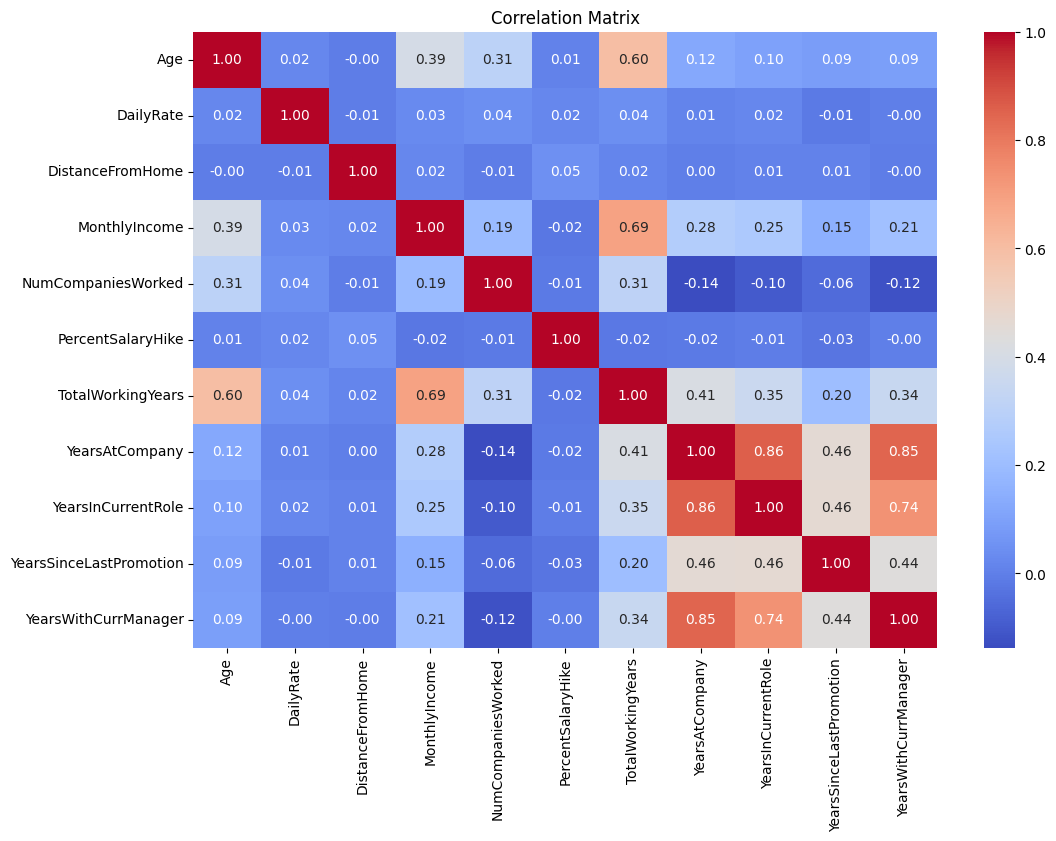

In [16]:

# Correlation Analysis
corr_matrix = attrition_df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Experience Drives Tenure: Longer working years strongly correlate with tenure, role duration, and manager association.

Income Rises with Experience: Age and work experience moderately influence monthly income.

Independent Factors: Distance from home, salary hikes, and daily rate show minimal impact on other metrics.








In [17]:
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


All columns are numeric now.


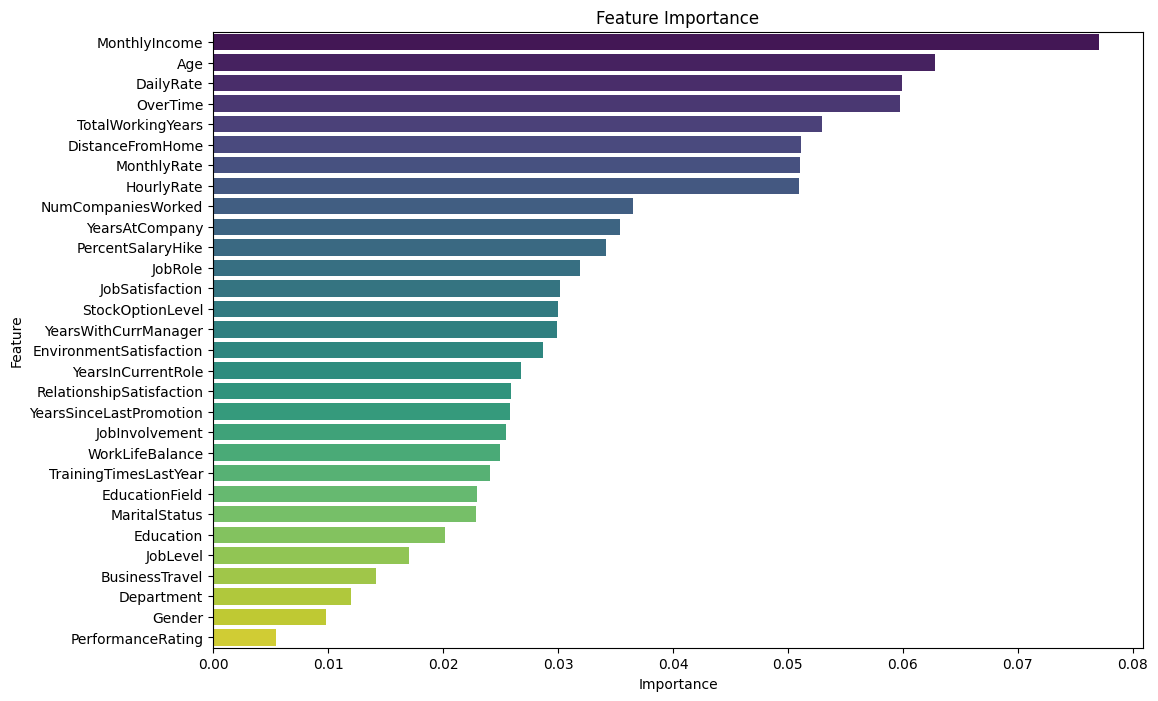

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'OverTime']
# Identify all categorical columns in the dataset
categorical_cols = attrition_df.select_dtypes(include=['object']).columns.tolist()

# Encode all categorical columns, including 'Attrition'
data_encoded = attrition_df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

# Ensure all columns are numeric
non_numeric_cols = data_encoded.select_dtypes(include=['object']).columns
if not non_numeric_cols.empty:
    print("Remaining non-numeric columns:", non_numeric_cols)
else:
    print("All columns are numeric now.")

# Define features (X) and target (y)
target = 'Attrition'
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

# # Confirm data types for debugging
# print("X types:\n", X.dtypes)
# print("y type:\n", y.dtype)

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Feature Importance Plot
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.show()


 `RandomForestClassifier` is effective for classifying and predicting HR-related outcomes based on complex, multidimensional employee data, making it useful for HR decision-making in companies like IBM.

  Random forests provide insights into feature importance, helping HR teams understand which factors (e.g., satisfaction, work-life balance, etc.) are most predictive of outcomes like attrition or performance.



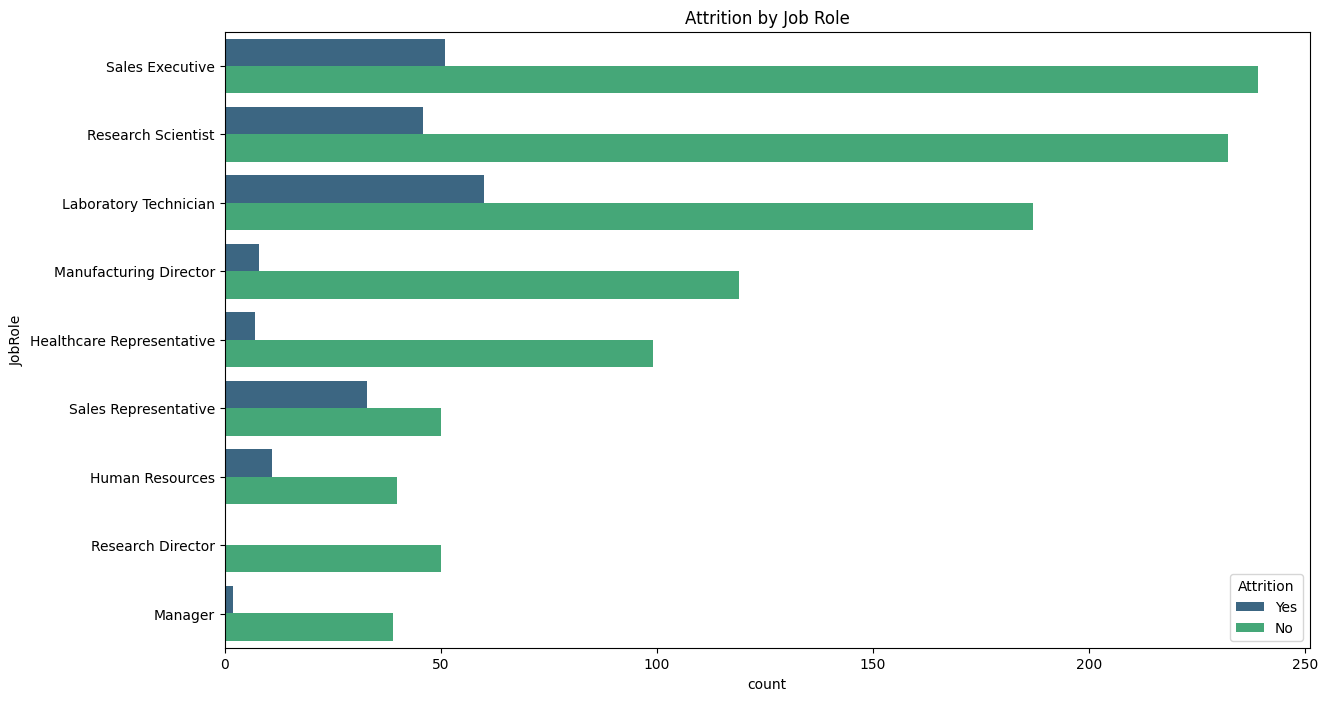

In [19]:
# Attrition by Job Role

plt.figure(figsize=(14, 8))
sns.countplot(data=attrition_df, y='JobRole', hue='Attrition', palette='viridis', order=attrition_df['JobRole'].value_counts().index)
plt.title('Attrition by Job Role')
plt.show()

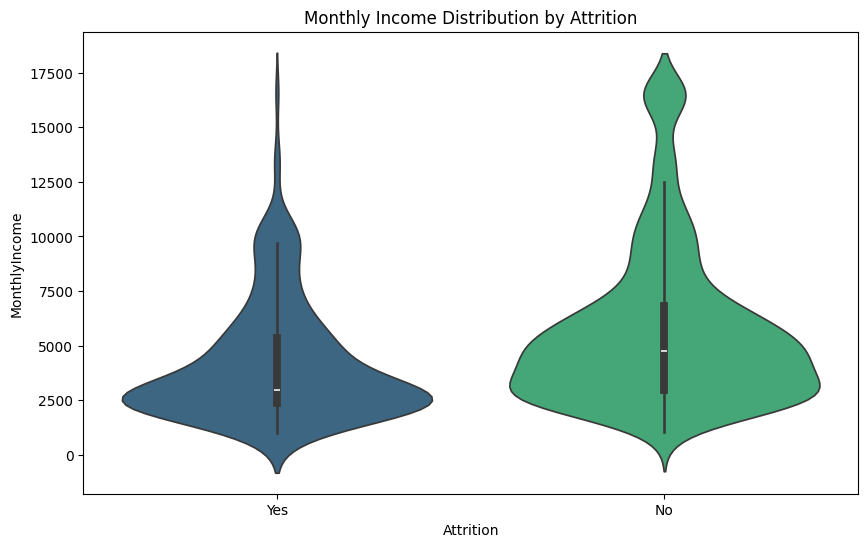

In [20]:
 # Violin plot of MonthlyIncome by Attrition
plt.figure(figsize=(10, 6))
sns.violinplot(data=attrition_df, x='Attrition', y='MonthlyIncome', palette='viridis')
plt.title('Monthly Income Distribution by Attrition')
plt.show()


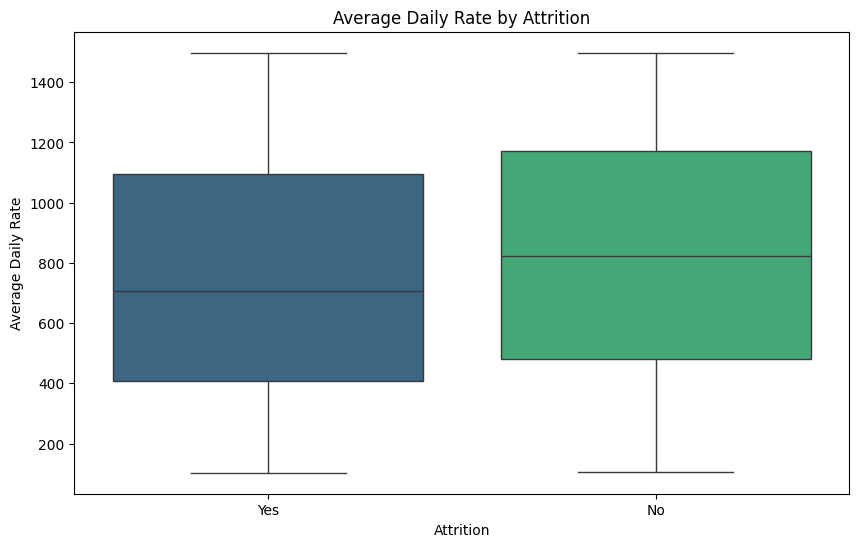

In [21]:
#Average Daily Rate By Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=attrition_df, x='Attrition', y='DailyRate', palette='viridis')
plt.title('Average Daily Rate by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Daily Rate')
plt.show()


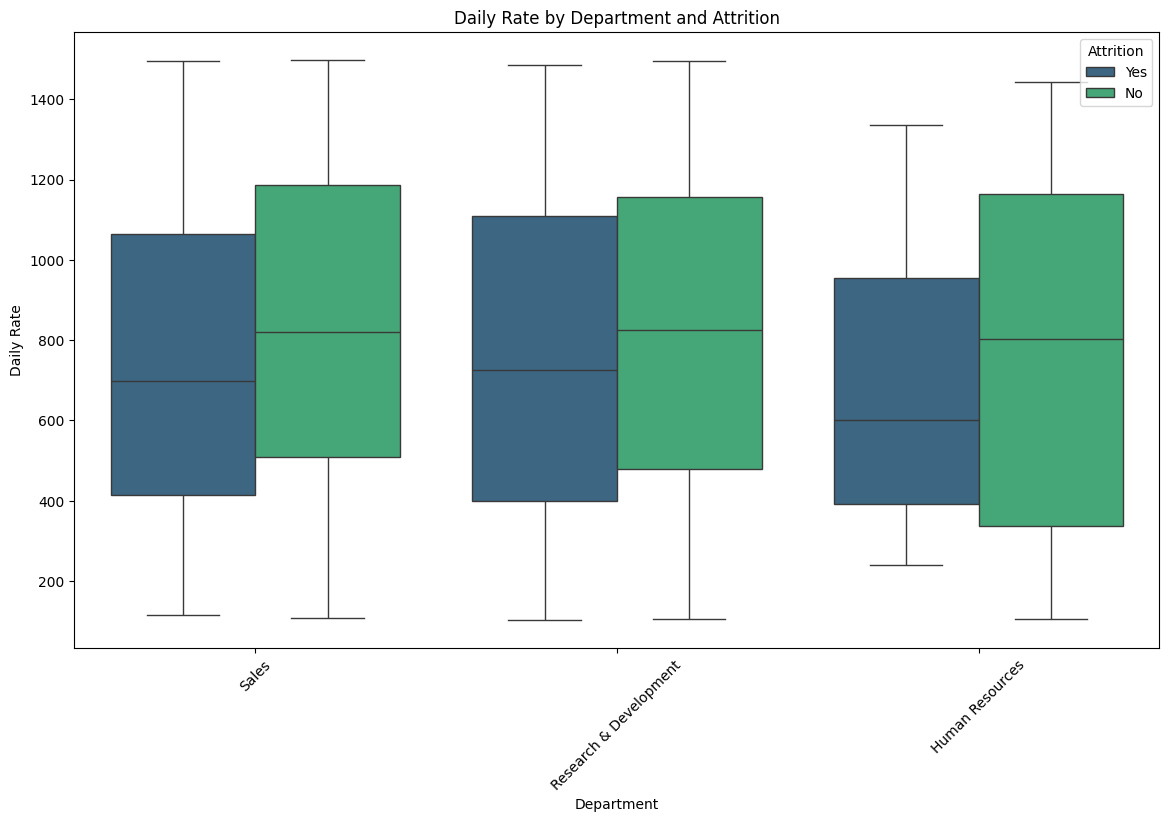

In [22]:
#Daily Rate by Department and Attrition
plt.figure(figsize=(14, 8))
sns.boxplot(data=attrition_df, x='Department', y='DailyRate', hue='Attrition', palette='viridis')
plt.title('Daily Rate by Department and Attrition')
plt.xlabel('Department')
plt.ylabel('Daily Rate')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.show()


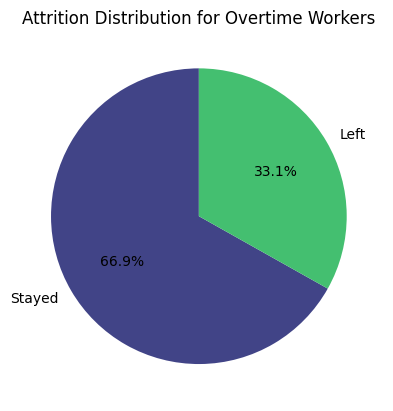

In [23]:
#Attrition Distribution for OverTime Workers
import matplotlib.cm as cm
# Use viridis colormap
cmap = cm.get_cmap('viridis')
colors = [cmap(0.2), cmap(0.7)]  # Adjust indices for contrast



overtime_attrition = attrition_df[attrition_df['OverTime'] == 'Yes']['Attrition'].value_counts()

overtime_attrition.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labels=['Stayed', 'Left'],
    title='Attrition Distribution for Overtime Workers'
)
plt.ylabel('')  # Removes the default y-axis label
plt.show()


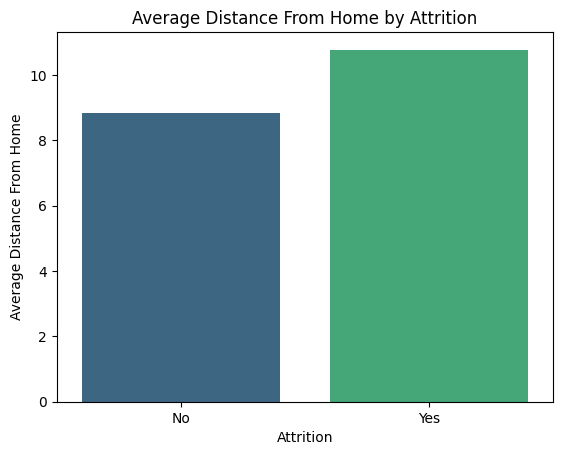

In [24]:
# Average Distance From Home by Attrition
avg_distance = attrition_df.groupby('Attrition')['DistanceFromHome'].mean().reset_index()

sns.barplot(data=avg_distance, x='Attrition', y='DistanceFromHome', palette='viridis')
plt.title('Average Distance From Home by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Distance From Home')
plt.show()


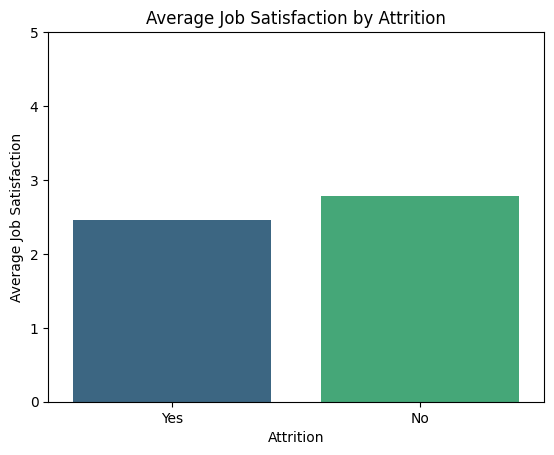

In [25]:
#Average Job Satisfaction by Attrition
sns.barplot(data=attrition_df, x='Attrition', y='JobSatisfaction', palette='viridis', ci=None)
plt.title('Average Job Satisfaction by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Job Satisfaction')
plt.ylim(0, 5)  # Assuming JobSatisfaction levels range from 1 to 4
plt.show()


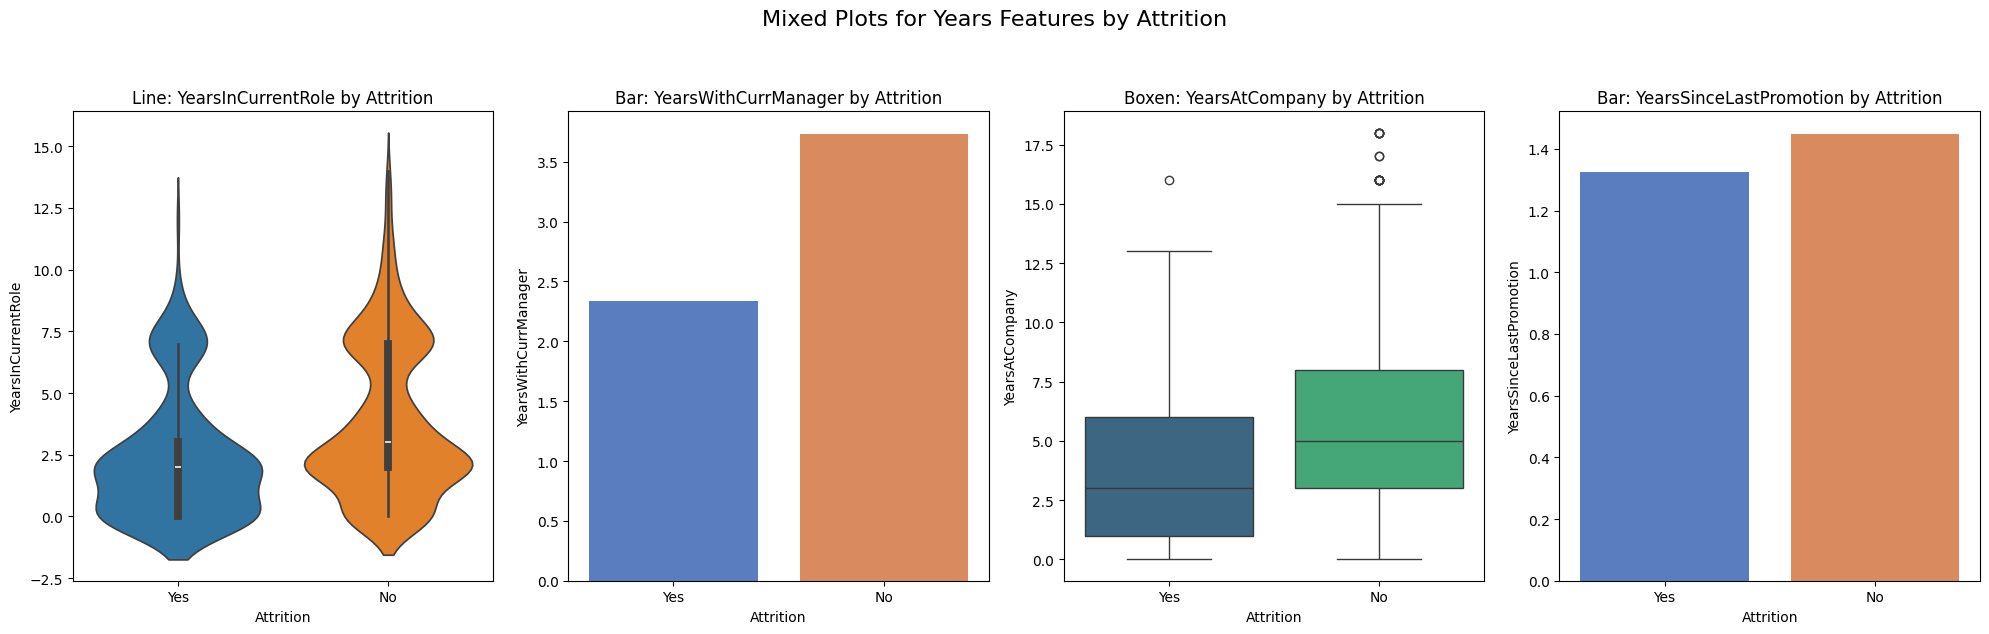

In [26]:
#Numerical Features
import matplotlib.pyplot as plt
import seaborn as sns

# Features to include
numerical_features = ['YearsInCurrentRole', 'YearsWithCurrManager', 'YearsAtCompany', 'YearsSinceLastPromotion']

# Create subplots for all features
fig, axes = plt.subplots(1, len(numerical_features), figsize=(20, 6), sharey=False)

# Iterate through the features and apply different plot types
for i, feature in enumerate(numerical_features):
    ax = axes[i]  # Select the appropriate subplot

    if i == 0:
        # Line plot for YearsInCurrentRole
        sns.violinplot(data=attrition_df, x='Attrition', y=feature, ax=ax,hue='Attrition')
        ax.set_title(f'Line: {feature} by Attrition', fontsize=12)

    elif i == 1:
        # Bar plot for YearsWithCurrManager
        sns.barplot(data=attrition_df, x='Attrition', y=feature, ci=None, palette='muted', ax=ax)
        ax.set_title(f'Bar: {feature} by Attrition', fontsize=12)

    elif i == 2:
        # Boxen plot for YearsAtCompany
        sns.boxplot(data=attrition_df, x='Attrition', y=feature, palette='viridis', ax=ax)
        ax.set_title(f'Boxen: {feature} by Attrition', fontsize=12)

    elif i == 3:
        # Simple bar chart for YearsSinceLastPromotion
        sns.barplot(data=attrition_df, x='Attrition', y=feature, ci=None, palette='muted', ax=ax)
        ax.set_title(f'Bar: {feature} by Attrition', fontsize=12)

# Adjust layout for readability
plt.suptitle('Mixed Plots for Years Features by Attrition', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


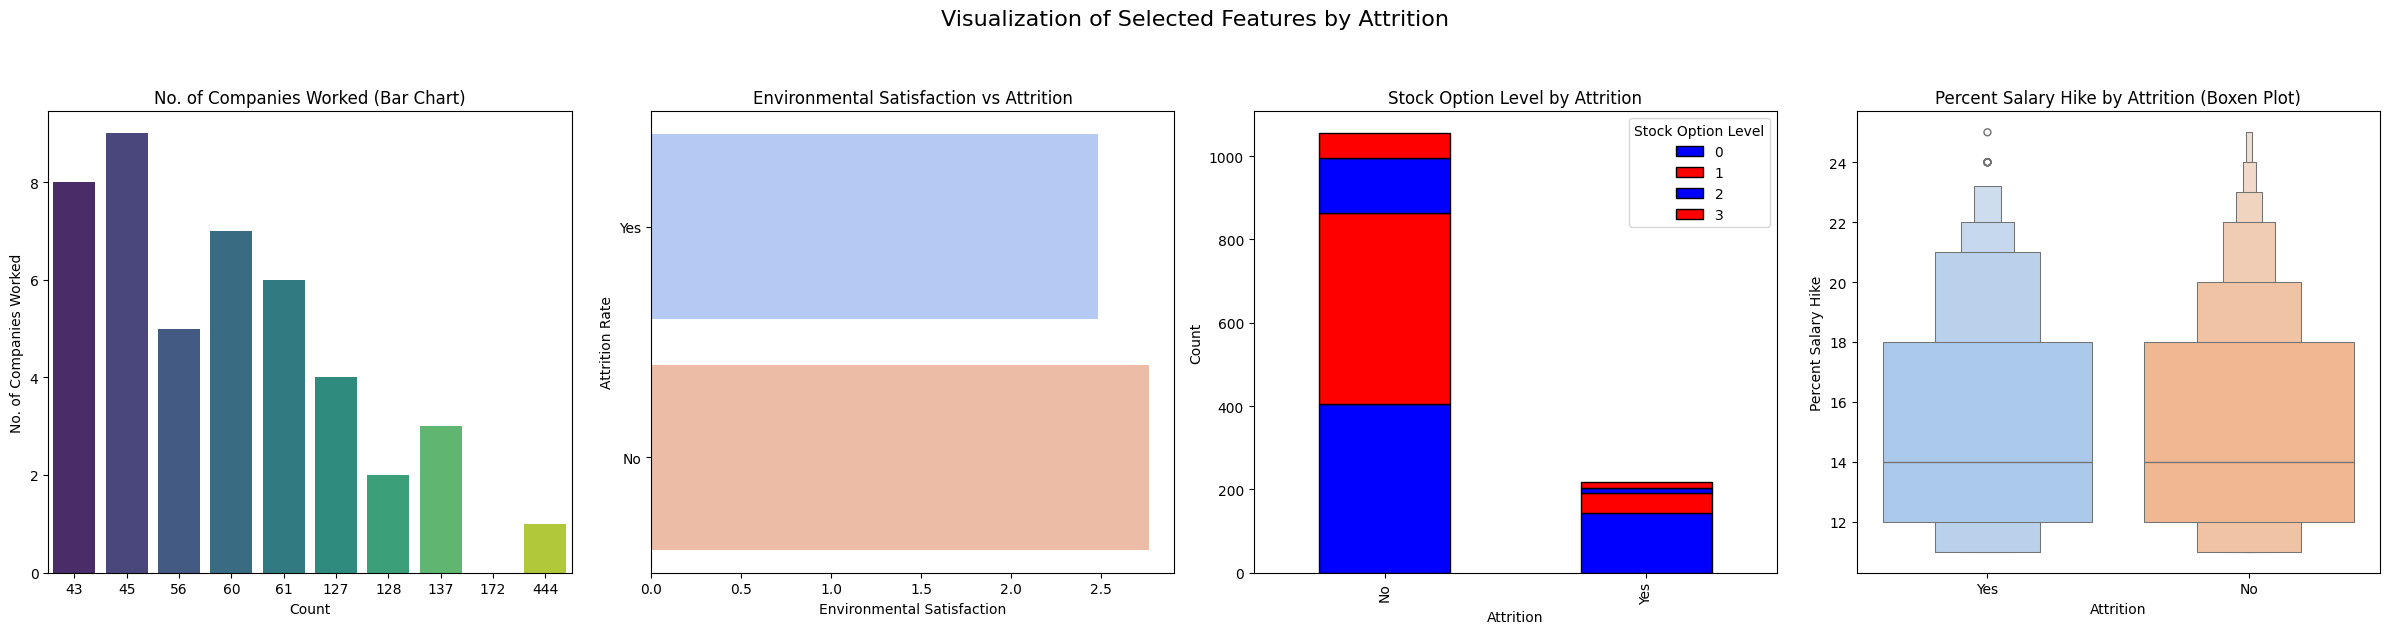

In [27]:
#Categorical Features
import matplotlib.pyplot as plt
import seaborn as sns

# Define features
categorical_features = ['NumCompaniesWorked', 'EnvironmentSatisfaction', 'StockOptionLevel', 'PercentSalaryHike']

# Create subplots
fig, axes = plt.subplots(1, len(categorical_features), figsize=(24, 6), sharey=False)

# Plot for NoOfCompaniesWorked (Horizontal Bar Chart)
ax = axes[0]
no_of_companies_counts = attrition_df['NumCompaniesWorked'].value_counts()
sns.barplot(
    y=no_of_companies_counts.index,
    x=no_of_companies_counts.values,
    palette='viridis',
    ax=ax
)
ax.set_title('No. of Companies Worked (Bar Chart)', fontsize=12)
ax.set_xlabel('Count')
ax.set_ylabel('No. of Companies Worked')


# Plot for EnvironmentalSatisfaction (Bar Plot)
ax = axes[1]
sns.barplot(
    data=attrition_df,
    x='EnvironmentSatisfaction',
    y='Attrition',
    ci=None,
    palette='coolwarm',
    ax=ax
)
ax.set_title('Environmental Satisfaction vs Attrition', fontsize=12)
ax.set_xlabel('Environmental Satisfaction')
ax.set_ylabel('Attrition Rate')

# Plot for StockOptionLevel (Stacked Bar Plot)
ax = axes[2]
stock_option_counts = attrition_df.groupby(['Attrition', 'StockOptionLevel']).size().unstack(fill_value=0)
stock_option_counts.plot(kind='bar', stacked=True, ax=ax, color=['blue', 'red'], edgecolor='black')
ax.set_title('Stock Option Level by Attrition', fontsize=12)
ax.set_xlabel('Attrition')
ax.set_ylabel('Count')
ax.legend(title='Stock Option Level')

# Plot for PercentSalaryHike (Boxen Plot)
ax = axes[3]
sns.boxenplot(
    data=attrition_df,
    x='Attrition',
    y='PercentSalaryHike',
    palette='pastel',
    ax=ax
)
ax.set_title('Percent Salary Hike by Attrition (Boxen Plot)', fontsize=12)
ax.set_xlabel('Attrition')
ax.set_ylabel('Percent Salary Hike')

# Adjust layout
plt.suptitle('Visualization of Selected Features by Attrition', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


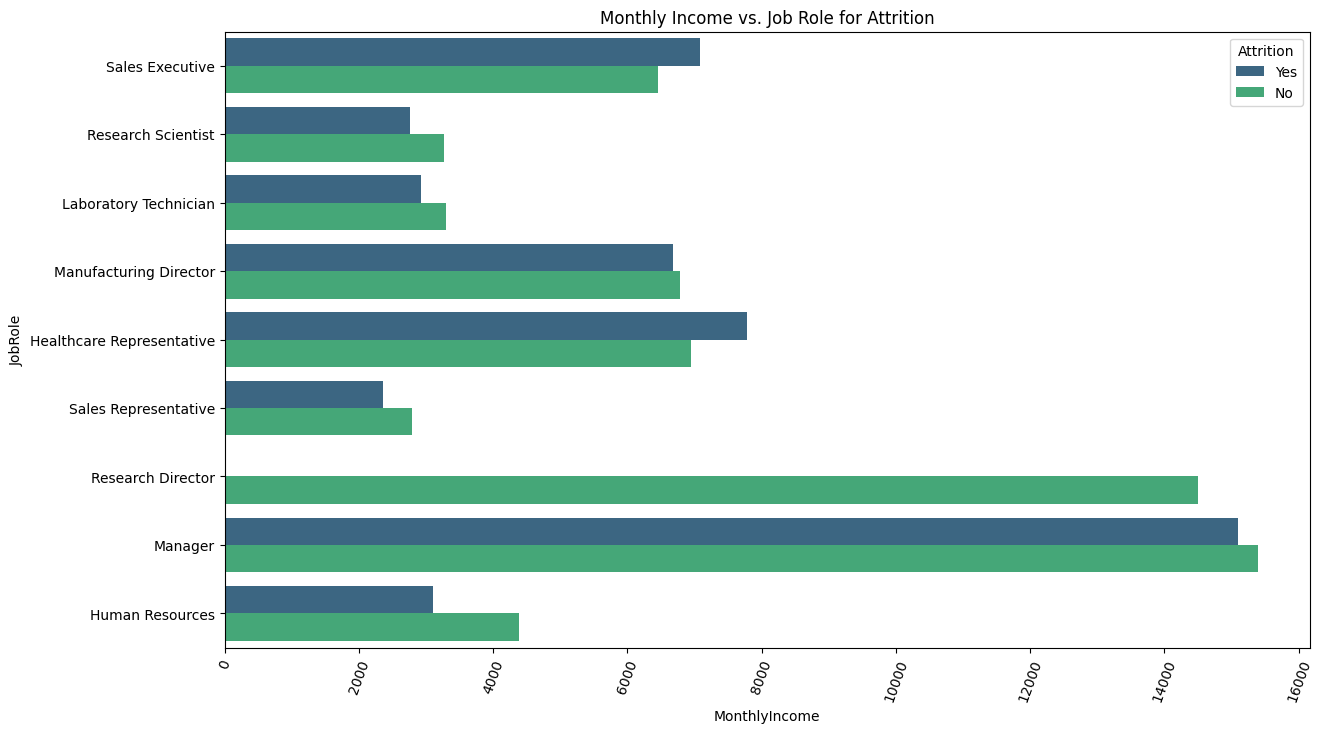

In [28]:
 # 1. Monthly Income vs Job Role for Attrition (Bar Plot)
plt.figure(figsize=(14, 8))
sns.barplot(data=attrition_df, x='MonthlyIncome', y='JobRole', hue='Attrition', ci=None, palette='viridis')
plt.title('Monthly Income vs. Job Role for Attrition')
plt.xticks(rotation=70)
plt.show()

In [29]:
import plotly.express as px

fig = px.scatter(attrition_df, x='Age', y='MonthlyIncome', color='Attrition', hover_data=['JobRole'])
fig.show()




Higher Attrition in Younger and Low-Income Groups: Younger employees (20–30 years) and those earning below 5,000 show the highest attrition rates.

Income Correlation with Retention: Higher-income employees (>10,000) have significantly lower attrition, highlighting income as a key retention factor.

Age-Income Trend: Monthly income increases with age, but attrition remains concentrated among low-income employees across all age groups.


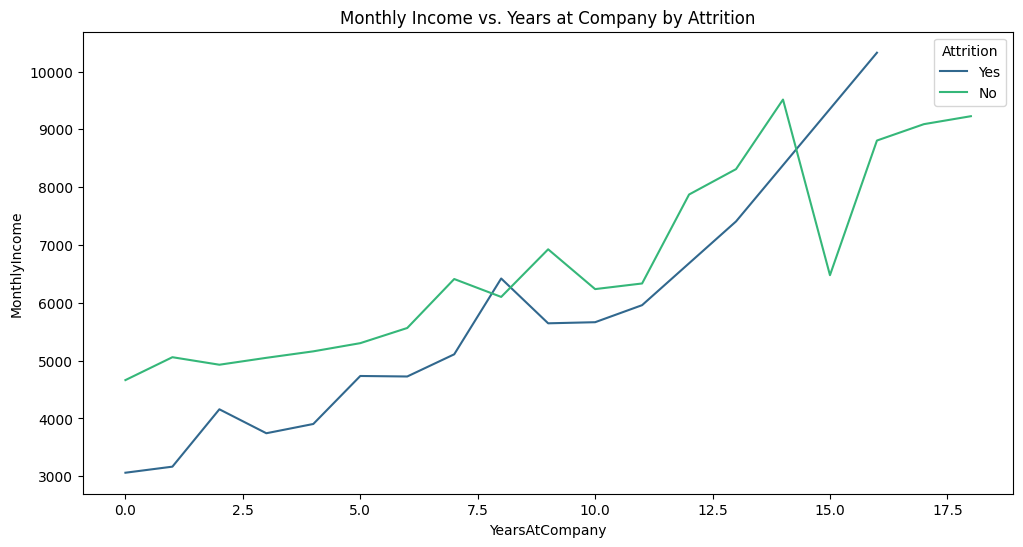

In [30]:

# 4. Monthly Income and Years at Company (Line Plot)
plt.figure(figsize=(12, 6))
sns.lineplot(data=attrition_df, x='YearsAtCompany', y='MonthlyIncome', hue='Attrition', palette='viridis', markers=True, ci=None)
plt.title('Monthly Income vs. Years at Company by Attrition')
plt.show()


Employees with fewer years at the company (0–5 years) and lower income exhibit higher attrition rates compared to long-tenured employees.

Monthly income steadily increases with years at the company, reflecting the impact of tenure on compensation.

Employees with more than 10 years at the company and higher incomes demonstrate significantly lower attrition rates.

In [31]:
attrition_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

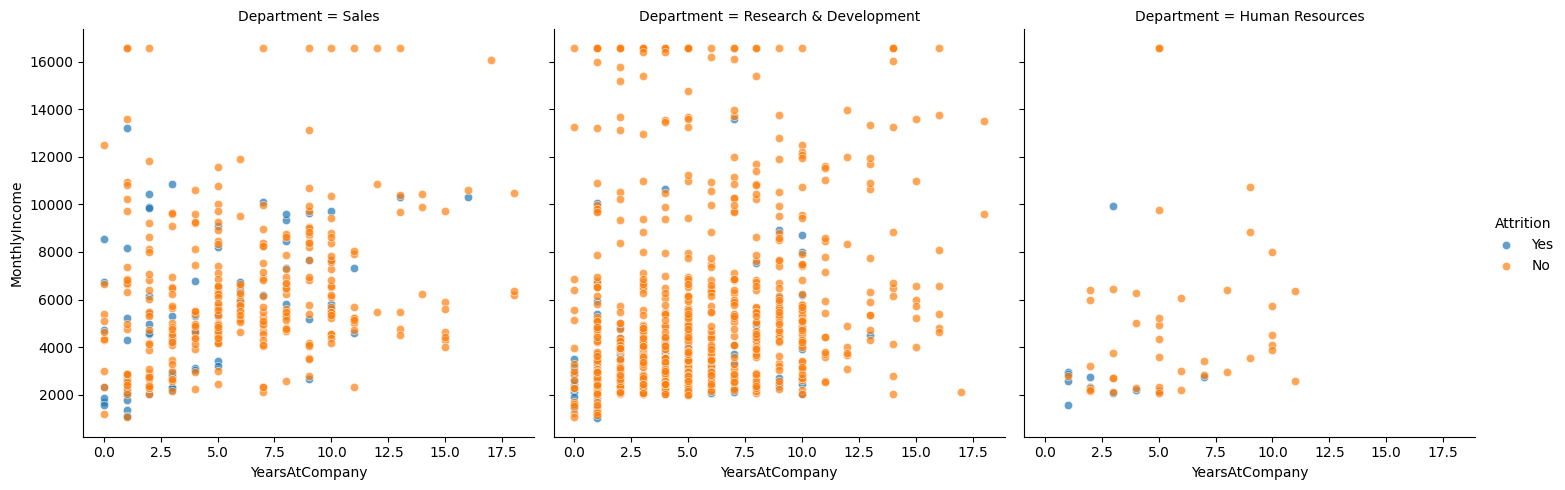

In [32]:
g = sns.FacetGrid(data=attrition_df, col="Department", hue="Attrition", height=5, aspect=1)
g.map(sns.scatterplot, "YearsAtCompany", "MonthlyIncome", alpha=0.7)
g.add_legend()


Employees with higher DailyRate tend to have lower attrition, and the distribution of DailyRate varies significantly across different departments.

Employees with lower monthly income are more likely to leave, regardless of their job satisfaction level.

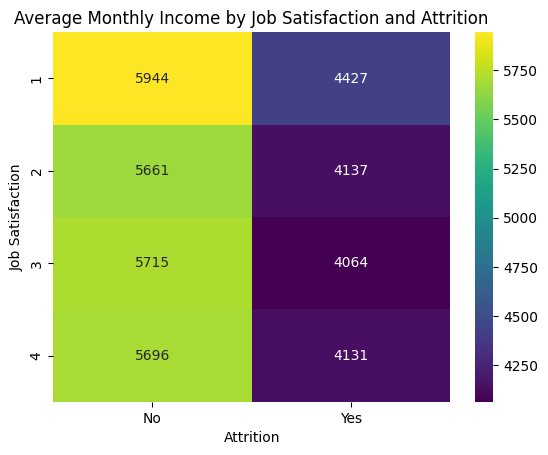

In [33]:
# Pivot table to calculate average monthly income
heatmap_data = attrition_df.pivot_table(values='MonthlyIncome', index='JobSatisfaction', columns='Attrition', aggfunc='mean')

sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='viridis', cbar=True)
plt.title('Average Monthly Income by Job Satisfaction and Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.show()


##Summary of Attrition Analysis
- Employees working overtime leave more often; flexible schedules may help.
- Low job satisfaction increases turnover; better engagement can reduce it.
- Long commutes cause more employees to leave; remote work could help.
- Shorter tenure or unstable roles lead to more quitting; career growth support is key.
- Lack of promotions drives people away; regular growth chances are important.
- Employees with many past jobs may need tailored retention plans.
- Poor workplace conditions increase quitting; improving them boosts retention.
- Limited stock options cause more attrition; better benefits improve loyalty.
- Small salary hikes push employees to leave; regular raises matter.
- Focus on work-life balance, engagement, flexibility, career growth, pay, and benefits.







